In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [6]:
upper_class = train_data[train_data.Pclass == 1]["Survived"]
rate_upper_class = sum(upper_class)/len(upper_class)

print("% of upper class who survived:", rate_upper_class)

% of upper class who survived: 0.6296296296296297


In [7]:
middle_class = train_data[train_data.Pclass == 2]["Survived"]
rate_middle_class = sum(middle_class)/len(middle_class)

print("% of middle class who survived:", rate_middle_class)

% of middle class who survived: 0.47282608695652173


In [8]:
lower_class = train_data[train_data.Pclass == 3]["Survived"]
rate_lower_class = sum(lower_class)/len(lower_class)

print("% of lower class who survived:", rate_lower_class)

% of lower class who survived: 0.24236252545824846


In [9]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    return np.nan

In [10]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']

In [11]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [12]:
alldata = pd.concat([train_data.drop('Survived', axis=1), test_data])
alldata = alldata.drop('PassengerId', axis=1)

In [13]:
alldata['Title']=alldata['Name'].map(lambda x: substrings_in_string(x, title_list))
alldata['Title']=alldata.apply(replace_titles, axis=1)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np

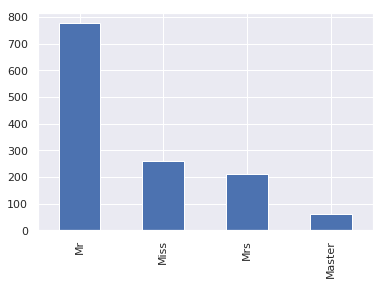

In [15]:
alldata['Title'].value_counts().plot(kind='bar')

In [16]:
alldata["Age"].fillna(alldata.groupby("Title")["Age"].transform("median"), inplace=True)

In [17]:
alldata["Cabin_Level"] = alldata["Cabin"].apply(lambda cabin: cabin[0] if pd.notnull(cabin) else cabin)
alldata["Cabin_Level"].fillna(alldata.groupby("Pclass")["Cabin_Level"].transform("first"), inplace=True)

In [18]:
alldata["Embarked"].fillna('S', inplace=True)

In [19]:
alldata["Fare"].fillna(alldata.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [20]:
alldata = alldata.drop(['Name', 'Ticket', 'Cabin'], axis=1) 

In [21]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Embarked       1309 non-null object
Title          1309 non-null object
Cabin_Level    1309 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB


In [22]:
alldata.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Level
0,3,male,22.0,1,0,7.2500,S,Mr,G
1,1,female,38.0,1,0,71.2833,C,Mrs,C
2,3,female,26.0,0,0,7.9250,S,Miss,G
3,1,female,35.0,1,0,53.1000,S,Mrs,C
4,3,male,35.0,0,0,8.0500,S,Mr,G
5,3,male,30.0,0,0,8.4583,Q,Mr,G
6,1,male,54.0,0,0,51.8625,S,Mr,E
7,3,male,2.0,3,1,21.0750,S,Master,G
8,3,female,27.0,0,2,11.1333,S,Mrs,G
9,2,female,14.0,1,0,30.0708,C,Mrs,D


In [23]:
alldata = pd.get_dummies(alldata, dummy_na=True)

In [24]:
alldata.isnull().values.any()

False

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
alldata = pd.DataFrame(scaler.fit_transform(alldata), columns = alldata.columns)

alldata.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,...,Title_nan,Cabin_Level_A,Cabin_Level_B,Cabin_Level_C,Cabin_Level_D,Cabin_Level_E,Cabin_Level_F,Cabin_Level_G,Cabin_Level_T,Cabin_Level_nan
0,1.0,0.273456,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.473882,0.125,0.0,0.139136,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.323563,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.436302,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.436302,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
# from sklearn.ensemble import RandomForestClassifier

# y = train_data["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch", "Title", "Age"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission2.csv', index=False)

In [27]:
y = train_data["Survived"]

X = alldata[:len(train_data)]
X_test = alldata[len(train_data):]

In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 26 columns):
Pclass             418 non-null float64
Age                418 non-null float64
SibSp              418 non-null float64
Parch              418 non-null float64
Fare               418 non-null float64
Sex_female         418 non-null float64
Sex_male           418 non-null float64
Sex_nan            418 non-null float64
Embarked_C         418 non-null float64
Embarked_Q         418 non-null float64
Embarked_S         418 non-null float64
Embarked_nan       418 non-null float64
Title_Master       418 non-null float64
Title_Miss         418 non-null float64
Title_Mr           418 non-null float64
Title_Mrs          418 non-null float64
Title_nan          418 non-null float64
Cabin_Level_A      418 non-null float64
Cabin_Level_B      418 non-null float64
Cabin_Level_C      418 non-null float64
Cabin_Level_D      418 non-null float64
Cabin_Level_E      418 non-null float64
Cabin_Level_

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
Pclass             891 non-null float64
Age                891 non-null float64
SibSp              891 non-null float64
Parch              891 non-null float64
Fare               891 non-null float64
Sex_female         891 non-null float64
Sex_male           891 non-null float64
Sex_nan            891 non-null float64
Embarked_C         891 non-null float64
Embarked_Q         891 non-null float64
Embarked_S         891 non-null float64
Embarked_nan       891 non-null float64
Title_Master       891 non-null float64
Title_Miss         891 non-null float64
Title_Mr           891 non-null float64
Title_Mrs          891 non-null float64
Title_nan          891 non-null float64
Cabin_Level_A      891 non-null float64
Cabin_Level_B      891 non-null float64
Cabin_Level_C      891 non-null float64
Cabin_Level_D      891 non-null float64
Cabin_Level_E      891 non-null float64
Cabin_Level_F  

In [30]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,...,Title_nan,Cabin_Level_A,Cabin_Level_B,Cabin_Level_C,Cabin_Level_D,Cabin_Level_E,Cabin_Level_F,Cabin_Level_G,Cabin_Level_T,Cabin_Level_nan
0,1.0,0.273456,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.473882,0.125,0.0,0.139136,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.323563,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.436302,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.436302,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch
import numpy as np

In [32]:
##########################
### SETTINGS
##########################

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters
learning_rate = 0.001
num_epochs = 1000
batch_size = len(X) // 50

# Architecture
num_features = len(X.columns.values)
num_classes = 2

In [33]:
X = torch.tensor(X.values)
y = torch.tensor(y.values)

train_loader = DataLoader(dataset=list(zip(X, y)),
                          batch_size=batch_size,
                          shuffle=True)

In [34]:
X_test = torch.tensor(X_test.values)

In [35]:
##########################
### MODEL
##########################

class SoftmaxRegression(torch.nn.Module):

    def __init__(self, num_features, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, 100)
        self.linear2 = torch.nn.Linear(100, 50)
        self.linear3 = torch.nn.Linear(50, num_classes)
        
        self.bn = torch.nn.BatchNorm1d(num_features)
        self.bn2 = torch.nn.BatchNorm1d(100)
        self.bn3 = torch.nn.BatchNorm1d(50)
        
    def forward(self, x):        
        logits = self.linear(x)
        logits = F.relu(logits)
                
        logits = self.bn2(logits)
        logits = self.linear2(logits)
        logits = F.relu(logits)
        
        logits = self.bn3(logits)
        logits = self.linear3(logits)
        logits = F.relu(logits)
        
        probas = F.softmax(logits, dim=1)
        return logits, probas

model = SoftmaxRegression(num_features=num_features,
                          num_classes=num_classes)

model.to(device)

SoftmaxRegression(
  (linear): Linear(in_features=26, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=2, bias=True)
  (bn): BatchNorm1d(26, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [36]:
##########################
### COST AND OPTIMIZER
##########################

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [37]:
def compute_accuracy(model, data_loader):
    correct_pred, num_examples = 0, 0
    
    for features, targets in data_loader:
        features = features.float().to(device)
        targets = targets.to(device)
        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
        
    return correct_pred.float() / num_examples * 100
    

for epoch in range(num_epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        features = features.float().to(device)
        targets = targets.to(device)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        
        # note that the PyTorch implementation of
        # CrossEntropyLoss works with logits, not
        # probabilities
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 10:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(X)//batch_size, cost))
            
    with torch.set_grad_enabled(False):
        print('Epoch: %03d/%03d training accuracy: %.2f%%' % (
              epoch+1, num_epochs, 
              compute_accuracy(model, train_loader)))

Epoch: 001/1000 | Batch 000/052 | Cost: 0.7891
Epoch: 001/1000 | Batch 010/052 | Cost: 0.7007
Epoch: 001/1000 | Batch 020/052 | Cost: 0.4175
Epoch: 001/1000 | Batch 030/052 | Cost: 0.5034
Epoch: 001/1000 | Batch 040/052 | Cost: 0.3748
Epoch: 001/1000 | Batch 050/052 | Cost: 0.4979
Epoch: 001/1000 training accuracy: 76.32%
Epoch: 002/1000 | Batch 000/052 | Cost: 0.4859
Epoch: 002/1000 | Batch 010/052 | Cost: 0.4413
Epoch: 002/1000 | Batch 020/052 | Cost: 0.4795
Epoch: 002/1000 | Batch 030/052 | Cost: 0.2848
Epoch: 002/1000 | Batch 040/052 | Cost: 0.4661
Epoch: 002/1000 | Batch 050/052 | Cost: 0.3653
Epoch: 002/1000 training accuracy: 79.01%
Epoch: 003/1000 | Batch 000/052 | Cost: 0.4411
Epoch: 003/1000 | Batch 010/052 | Cost: 0.4854
Epoch: 003/1000 | Batch 020/052 | Cost: 0.3839
Epoch: 003/1000 | Batch 030/052 | Cost: 0.3855
Epoch: 003/1000 | Batch 040/052 | Cost: 0.2925
Epoch: 003/1000 | Batch 050/052 | Cost: 0.8493
Epoch: 003/1000 training accuracy: 79.35%
Epoch: 004/1000 | Batch 000/

In [38]:
 logits, probas = model.forward(X_test.float())

In [39]:
 _, predicted_labels = torch.max(probas, 1)

In [40]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId.tolist(), 'Survived': predicted_labels.tolist()})
output.to_csv('deep_learning_last.csv', index=False)

In [41]:
output.head(30)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
